<a href="https://colab.research.google.com/github/AmnaAbdellatif/Projects-avec-Machine-Learning-/blob/main/Copie_de_Formation_ISSATSO_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Manipulation

*   Reading Data 
*   Exploring Data:
    - Missing values
    - Incoherent data types
    - Incoherent values
    - Outliers



In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/elyesmanai/Data-Science-Datasets/main/EDA%20-%20Spotify%20Top10%202010%20-%202019.csv")

In [ ]:
print(type(data),
type(data.title),
type(data.title.values))

# array is just a list of numbers
# series is an array with an index
# dataframe is a list of series

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [ ]:
data[['title','bpm']]
# multi column series

,title,bpm
0,"Hey, Soul Sister",97.0
1,Love The Way You Lie,87.0
2,TiK ToK,120.0
3,Bad Romance,119.0
4,Just the Way You Are,109.0
...,...,...
599,Find U Again (feat. Camila Cabello),104.0
600,Cross Me (feat. Chance the Rapper & PnB Rock),95.0
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",136.0
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),114.0


In [ ]:
data.isna()
# data.isnull() does the same thing
 
data.isna().sum() # ta3tini somme des valeurs manquantes ta3 kol colonne
data.isna().sum().sum() # ta3tini somme totale des valeurs manquantes

# on a 1 valeure manquante fil bpm

1

In [ ]:
# mode dev
data.duplicated().sum() # 3ana une valeure dupliquée

1

In [ ]:
data.drop_duplicates(inplace=True)
# OR
#data = data.drop_duplicates()

In [ ]:
# mode production
if data.duplicated().sum() >0:
  data.drop_duplicates(inplace=True).reset_index()

In [ ]:
data.shape # ta3tina nombre de lignes et colonnes

In [ ]:
data.reset_index() # t3awed ti7sib les indexs w t3abi il faraghat

In [ ]:
data.dtypes

In [ ]:
data = data['pop'].astype('float32')

In [ ]:
data.astype({
    'pop': 'float32',
    'bpm': ''
})

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data

## Exercice: 
- Remove all commas "," from the "title" column
- make all values of "dB" positive

- remove extra space at the start & end of the "artist"
- create new column named "chata7a" if dnce value ta3 line akber min 70 (True/False)

In [ ]:
data['title'] = data['title'].str.replace(",","")
data['dB'] = abs(data['dB'])
data['artist'] = data['artist'].str.strip()
data['chata7a'] = data['dnce'] > 70

In [ ]:
def threshhold(value):
  if value > 70:
    return value
  else:
    return False

In [ ]:
data['chata7a'] = data['dnce'].apply(threshhold)

## Statistics

In [ ]:
.mean()
.max()
.min()
.unique()
.nunique()
.median()
.quantile(q=0.66)
.std()

In [ ]:
data.describe()

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,602.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.541528,70.504146,64.379768,5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,68.041459
std,174.215384,2.607057,24.815776,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,40.687570
min,1.000000,2010.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,4.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,6.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,60.000000,74.000000,98.000000,424.000000,99.000000,48.000000,1000.000000


In [ ]:
data.describe(include="object")

,title,artist,top genre
count,603,603,603
unique,584,184,50
top,I Like It,Katy Perry,dance pop
freq,2,17,327


## Filtering

In [ ]:
data[ data['bpm'] >= 150 ] # ops: == != < > <= >=
data[ data['artist'] == "Katy Perry"]
 data[ data['artist'].isin(["Katy Perry"]) ] 
hype = data[ 
     ((data['artist'] == "Katy Perry") & (data['dnce']>70))
     |
     ((data['year'] < 2015) & (data['bpm']> data.bpm.quantile()))
 ]

In [ ]:
data['bpm'] > 150

## Exercice

[Link to dataset](https://github.com/elyesmanai/Data-Science-Datasets/blob/main/EDA%20-%20Tunisian%20Food%20Database%20-%20Products.csv)

1.   How many products does each company have?
2.    how many categories are there?
3.    what is the most and least protein dense food?
4.    Sort the products by order of most to least caloric
5.    Which foods have the least amount of calories and the most amounts of protein?
6.  What 3 columns are the most missing?
7.  What is the standard deviation of calories for each category ?


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/elyesmanai/Data-Science-Datasets/main/EDA%20-%20Tunisian%20Food%20Database%20-%20Products.csv")
data.duplicated().sum()

0

In [ ]:
# question 1:
saida = data[ data["Producer"] == "Saida"]
delice =  data[ data["Producer"] == "Délice"]

In [ ]:
print(saida.shape[0], delice.shape[0])

157 64


In [ ]:
data.groupby('Producer').size()

Producer
Délice     63
Saida     156
Name: Product, dtype: int64

In [ ]:
# Question 2
data['Category'].nunique()

6

In [ ]:
# Question 3
for column in data.columns:
  data[column] = data[column].str.lower()
  data[column] = data[column].str.replace('kcal', '')
  data[column] = data[column].str.replace('\t', '')
  data[column] = data[column].str.strip()

macros = ['Calories (100g)',"Lipides (Fat)",	"Saturés ",	"Glucides (Carbs)"	,"Sucre"	, "Protein"	,"Sel"]
for column in macros:
  data[column] = data[column].str.replace('g', '')
  data[column] = data[column].str.replace('r', '')
  data[column] = data[column].str.replace(',', '.')
  data[column] = data[column].str.replace('<', '')
  data[column] = data[column].str.replace('>', '')
  data[column] = data[column].replace('-', float('nan'))
  data[column] = data[column].str.strip()
  data[column] = data[column].astype("float64")

In [ ]:
data[ (data.Protein == data.Protein.max()) | 
     (data.Protein == data.Protein.min())
     ]

,Producer,Category,Product,Calories (100g),Lipides (Fat),Saturés,Glucides (Carbs),Sucre,Protein,Sel,Portion Size
4,saida,chocolat,happyfull fruits / happyfull cubies,369.000,0.0,NaN,92.00,54.0,0.0,0.36,-
10,saida,chocolat,happyfull rings,372.000,0.0,NaN,93.00,58.0,0.0,0.33,-
141,saida,cheese,président à tartiner - fraidoux enrichi en cal...,202.000,18.0,NaN,4.00,NaN,56.0,NaN,-
161,délice,carbonated drink,délio - mint,32.722,0.0,NaN,7.47,NaN,0.0,NaN,-


In [ ]:
# Question 4:
data.sort_values('Calories (100g)', ascending=False)

,Producer,Category,Product,Calories (100g),Lipides (Fat),Saturés,Glucides (Carbs),Sucre,Protein,Sel,Portion Size
203,délice,dairy products,extra fine unsalted butter,730.00,80.00,NaN,0.63,NaN,0.72,NaN,-
130,saida,chocolat,mythic sensation noir noisettes,618.00,44.80,NaN,40.70,NaN,12.90,NaN,-
97,saida,chocolat,sensation noir noisettes,618.00,44.80,NaN,40.70,NaN,12.90,NaN,-
96,saida,chocolat,dégustation noir,590.00,49.00,NaN,30.00,NaN,7.00,NaN,-
129,saida,chocolat,tris croquant,582.00,39.30,NaN,58.80,NaN,5.90,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...
0,saida,biscuits,gauffrette mandarine-citron,29.76,28.96,NaN,59.79,NaN,3.46,NaN,-
158,délice,carbonated drink,délio - ananas,29.08,0.01,NaN,6.25,NaN,0.75,NaN,-
191,délice,dairy products,déliso 10 vitamines vanilla flavored milk,17.68,1.50,NaN,14.00,NaN,1.00,NaN,-
192,délice,dairy products,déliso 10 vitamines strawberry flavored milk,14.34,0.80,NaN,11.80,NaN,1.60,NaN,-


In [ ]:
# Question 5:
data.sort_values(
    ['Calories (100g)','Protein'],
     ascending=[True, False]
     )

,Producer,Category,Product,Calories (100g),Lipides (Fat),Saturés,Glucides (Carbs),Sucre,Protein,Sel,Portion Size
193,délice,dairy products,déliso 10 vitamines chocolate flavored milk,14.10,0.70,NaN,11.80,NaN,1.40,NaN,-
192,délice,dairy products,déliso 10 vitamines strawberry flavored milk,14.34,0.80,NaN,11.80,NaN,1.60,NaN,-
191,délice,dairy products,déliso 10 vitamines vanilla flavored milk,17.68,1.50,NaN,14.00,NaN,1.00,NaN,-
158,délice,carbonated drink,délio - ananas,29.08,0.01,NaN,6.25,NaN,0.75,NaN,-
0,saida,biscuits,gauffrette mandarine-citron,29.76,28.96,NaN,59.79,NaN,3.46,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...
129,saida,chocolat,tris croquant,582.00,39.30,NaN,58.80,NaN,5.90,NaN,-
96,saida,chocolat,dégustation noir,590.00,49.00,NaN,30.00,NaN,7.00,NaN,-
97,saida,chocolat,sensation noir noisettes,618.00,44.80,NaN,40.70,NaN,12.90,NaN,-
130,saida,chocolat,mythic sensation noir noisettes,618.00,44.80,NaN,40.70,NaN,12.90,NaN,-


In [ ]:
data.isna().sum().sort_values(ascending=False)[:3].index

Index(['Saturés ', 'Sel', 'Sucre'], dtype='object')

In [ ]:
data.groupby('Category')['Calories (100g)'].std()

Category
biscuits             79.643813
carbonated drink      1.307982
cheese               65.425690
chocolat             78.893653
dairy products      125.938095
juice                 4.365855
Name: Calories (100g), dtype: float64

# Part 2: Plotting

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/elyesmanai/Data-Science-Datasets/main/Viz%20-%20MarketingRawData.csv')
data

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46,34,11,11,2020,Monday,707,465,651.375000,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250000,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375000,Promotion Blue
3,12/11/2020,46,34,11,11,2020,Thursday,1726,11712,1801.750000,No Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500000,No Promo
...,...,...,...,...,...,...,...,...,...,...,...
177,05/05/2021,19,60,5,17,2021,Wednesday,1400,7284,1119.600000,No Promo
178,06/05/2021,19,60,5,17,2021,Thursday,2244,13021,2067.888889,Promotion Red
179,07/05/2021,19,60,5,17,2021,Friday,2023,4587,1450.200000,No Promo
180,08/05/2021,19,60,5,17,2021,Saturday,1483,5927,1121.875000,No Promo


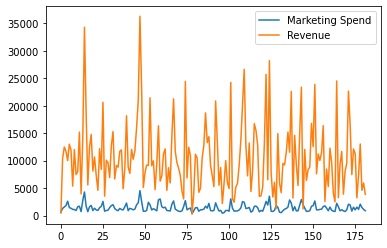

In [ ]:
data[['Marketing Spend','Revenue']].plot()

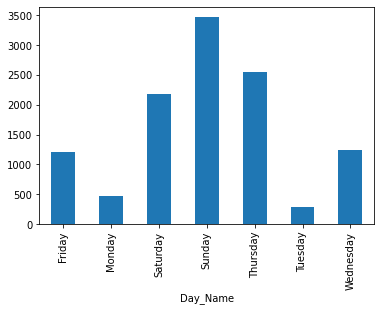

In [ ]:
data.groupby('Day_Name')['Revenue'].min().plot(kind="bar")

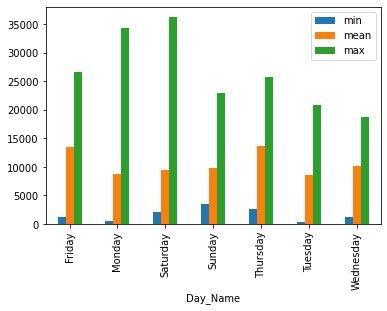

In [ ]:
data.groupby('Day_Name')['Revenue'].agg(["min",'mean','max']).plot(kind="bar")

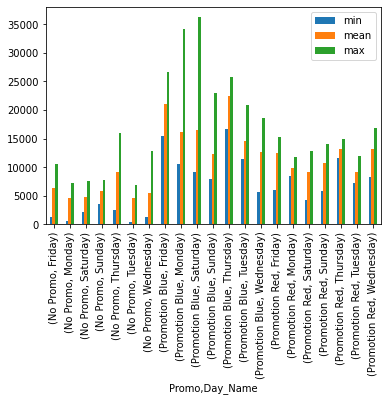

In [ ]:
data.groupby(['Promo','Day_Name'])['Revenue'].agg(["min",'mean','max']).plot(kind="bar")

## Exercice 2:
- plot visiteurs par rapport revenu (tip: for better clarity, use style="o" in the parameters)
- explain difference between Week_ID & Month_ID  and week & month through plot
- a3tini la distribution du Marketing Spend (est-ce que fama outlier?)

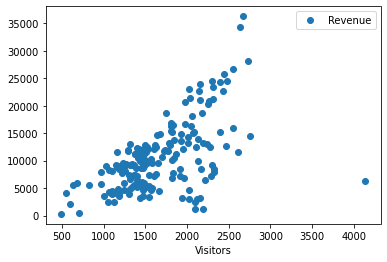

In [ ]:
data.plot(x="Visitors", y="Revenue", style="o")

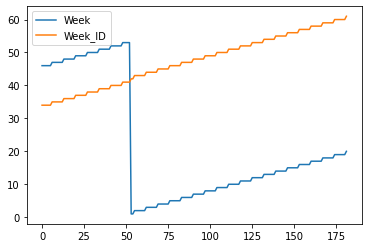

In [ ]:
data[['Week','Week_ID']].plot()

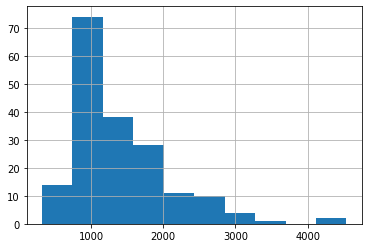

In [ ]:
data['Marketing Spend'].hist()

- Seaborn
- plotly
- matplotlib

# Part 3: Machine Learning
## Regression

In [ ]:
data

In [ ]:
features = data.drop(columns=['Revenue','Date','Visitors','Promo','Day_Name']) # or inputs or X
labels = data['Revenue'] # or output or Y or target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = lr.predict(X_test)
mean_absolute_error(y_test, predictions)

2777.7274154462275

### Cross validation

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/elyesmanai/Data-Science-Datasets/main/Viz%20-%20MarketingRawData.csv')

In [ ]:
features = data.drop(columns=['Revenue','Date','Visitors','Promo','Day_Name']) # or inputs or X
labels = data['Revenue'] # or output or Y or target

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lasso = Lasso()
ridge = Ridge()
lr = LinearRegression()

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(lr, features, labels, cv=10, n_jobs=-1)
scores_lasso = cross_val_score(lasso, features, labels, cv=10, n_jobs=-1)
scores_ridge = cross_val_score(ridge, features, labels, cv=10, n_jobs=-1)

In [ ]:
print(f"{scores_lr}\n{scores_lasso}\n{scores_ridge}")

[ 0.71033817  0.64877018  0.76404665 -0.45652089  0.68139861  0.79450127
  0.75596684  0.23487794  0.52276879  0.4187714 ]
[ 0.71027084  0.64865886  0.76416286 -0.45682211  0.68152279  0.79440738
  0.75608057  0.2346765   0.52289176  0.418221  ]
[ 0.71019882  0.64849782  0.76447215 -0.45730168  0.68410959  0.79430788
  0.75691344  0.23453107  0.52361939  0.41844567]


In [ ]:
features

,Week,Week_ID,Month,Month_ID,Year,Marketing Spend
0,46,34,11,11,2020,651.375000
1,46,34,11,11,2020,1298.250000
2,46,34,11,11,2020,1559.375000
3,46,34,11,11,2020,1801.750000
4,46,34,11,11,2020,2614.500000
...,...,...,...,...,...,...
177,19,60,5,17,2021,1119.600000
178,19,60,5,17,2021,2067.888889
179,19,60,5,17,2021,1450.200000
180,19,60,5,17,2021,1121.875000


In [ ]:
data.corr()
# ta3tina les correlations entre chaque 2 features, entre -1 et 1
# 0.6 to 1 yitsama corrélé positivement bilgde, w -0.6 to -1 corrélé négativement bilgde
# na7iw li mouch corrélé, mais faut faire attention lil multi colinearity (feature corrélée b feature okhra li bizhar corrélée avec label)
# najmou ntal3ou which to remove by comparing the correlation score of the 3 features and determing who's the more decisive for the label
# doesn't take into consideration text.
# this doesn't always solve the issue, you still need to check post training for feature importances

,Week,Week_ID,Month,Month_ID,Year,Visitors,Revenue,Marketing Spend
Week,1.000000,-0.632046,0.997533,-0.613606,-0.967390,0.031017,0.091383,0.109012
Week_ID,-0.632046,1.000000,-0.631898,0.986144,0.807718,-0.045500,-0.073020,-0.104269
Month,0.997533,-0.631898,1.000000,-0.601891,-0.965465,0.036018,0.090573,0.112148
Month_ID,-0.613606,0.986144,-0.601891,1.000000,0.789160,-0.033006,-0.072742,-0.094298
Year,-0.967390,0.807718,-0.965465,0.789160,1.000000,-0.038470,-0.093391,-0.117017
Visitors,0.031017,-0.045500,0.036018,-0.033006,-0.038470,1.000000,0.573842,0.824810
Revenue,0.091383,-0.073020,0.090573,-0.072742,-0.093391,0.573842,1.000000,0.790425
Marketing Spend,0.109012,-0.104269,0.112148,-0.094298,-0.117017,0.824810,0.790425,1.000000


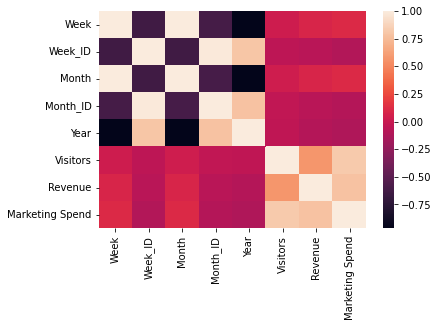

In [ ]:
import seaborn as sns

sns.heatmap(data.corr())

## Exercice: with seaborn
- make pairplot of all the data
- make pairplot of marketing spend, revenue with day_name
- make pairplot of marketing spend, revenue with promo

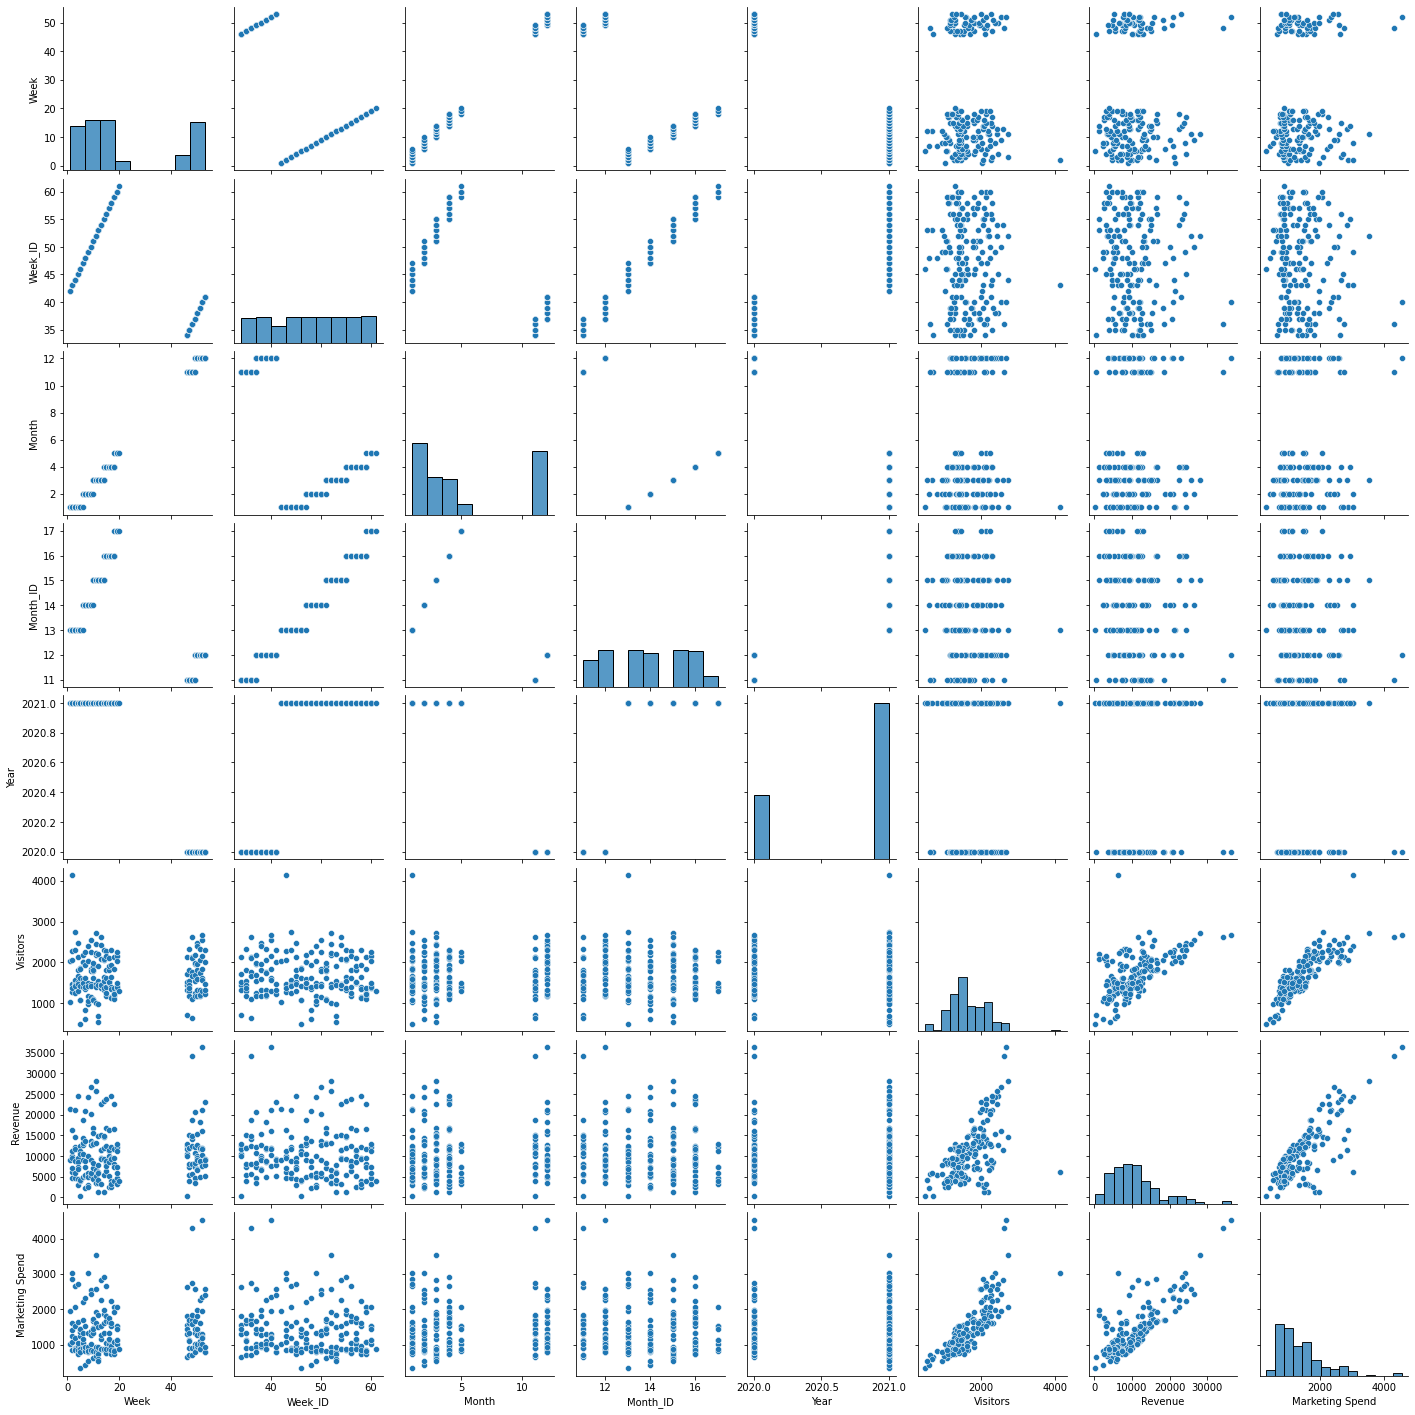

In [ ]:
import seaborn as sns

sns.pairplot(data)

In [ ]:
data_useful = data[['Marketing Spend','Revenue','Visitors', 'Promo']]

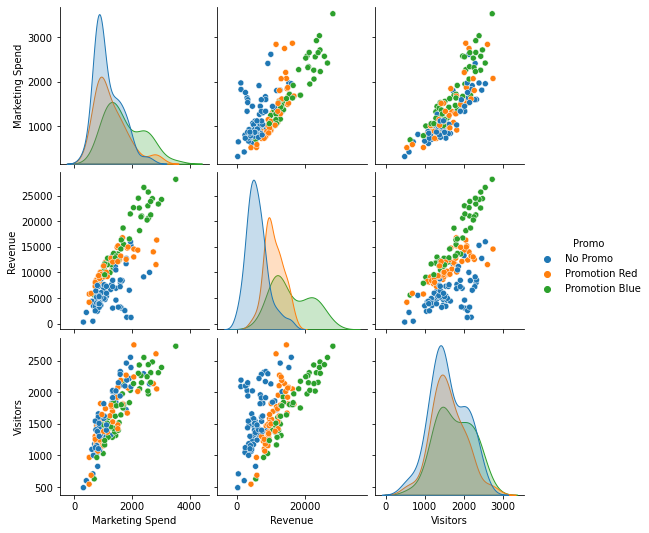

In [ ]:
sns.pairplot(data_useful, hue='Promo') # promotions te3ik mouhim w ijibou barcha flous, wasel

## Categorical Encoding

In [ ]:
# Text Encoding - Categorical Encoding
# Label Encoding
data['Promo'].map({
    "No Promo": 0,
    'Promotion Red':1,
    'Promotion Blue':2
})

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Promo'] = le.fit_transform(data['Promo'])

In [ ]:
# Lil tafsir
pd.get_dummies(data, columns=['Promo'])
# or
pd.get_dummies(features)

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/elyesmanai/Data-Science-Datasets/main/Viz%20-%20MarketingRawData.csv')

In [ ]:
data = data[ (data['Visitors'] < 4000) & (data['Marketing Spend']< 4000)]

In [ ]:
features = data[['Marketing Spend','Promo']] # or inputs or X
labels = data['Revenue'] # or output or Y or target

In [ ]:
features = pd.get_dummies(features)

In [ ]:
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(lr, features, labels, cv=10, n_jobs=-1)
scores_lasso = cross_val_score(lasso, features, labels, cv=10, n_jobs=-1)
scores_ridge = cross_val_score(ridge, features, labels, cv=10, n_jobs=-1)

In [ ]:
print(f"{scores_lr.mean()} - {scores_lr.std()} \n {scores_lasso.mean()} - {scores_lasso.std()} \n {scores_ridge.mean()} - {scores_ridge.std()}")

0.781400540595992 - 0.07759245778082238 
 0.7814389400687956 - 0.07757399995675497 
 0.7822169912356775 - 0.07727220778727155


In [ ]:
0.6156182809870341 - 0.33084050689944783
0.6534282544258225 - 0.2587431750910104  - with label encoding ta3 promo 
0.7728199102155447 - 0.13438094638319265 - with OHE / dummies  ta3 promo

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = lr.predict(X_test)
mean_absolute_error(y_test, predictions)

1656.8079868199081

In [ ]:
2777.7274154462275
2422.3254781215146 - label encoding ta3 promo
2023.0299733650313 - one hot encoding ta3 promo

# Exercice :

[Dataset Link](https://archive.ics.uci.edu/ml/datasets/air+quality#)

- create a Linear regression model on the above dataset and try to minimize the error
- Label: RH


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip

--2022-01-28 20:03:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1.47M  4.06MB/s    in 0.4s    

2022-01-28 20:03:32 (4.06 MB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]



In [ ]:
!unzip AirQualityUCI.zip

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [ ]:
import pandas as pd
data = pd.read_csv('AirQualityUCI.csv', sep=";")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [ ]:
data[ data['Date'].isna() ]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# remove empty columns
data.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)

# remove empty lines
data.dropna(how="all", inplace=True)

# replace , with . and cast to float
data.replace(',','.', regex=True,inplace=True)
for column in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
  data[column] = data[column].astype('float')

# encode time into integers b7okm li houma sweya3 purs
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data['Time'] = le.fit_transform(data['Time'])

# Date: feature engineering
#data['Day'] = data['Date'].str[:2] # or do function and apply

In [ ]:
features = data.drop(columns=['RH','Date'])
labels = data['RH']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
mean_absolute_error(y_test, predictions)

6.147490203833576

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb74128cbd0>,
      dtype=object)

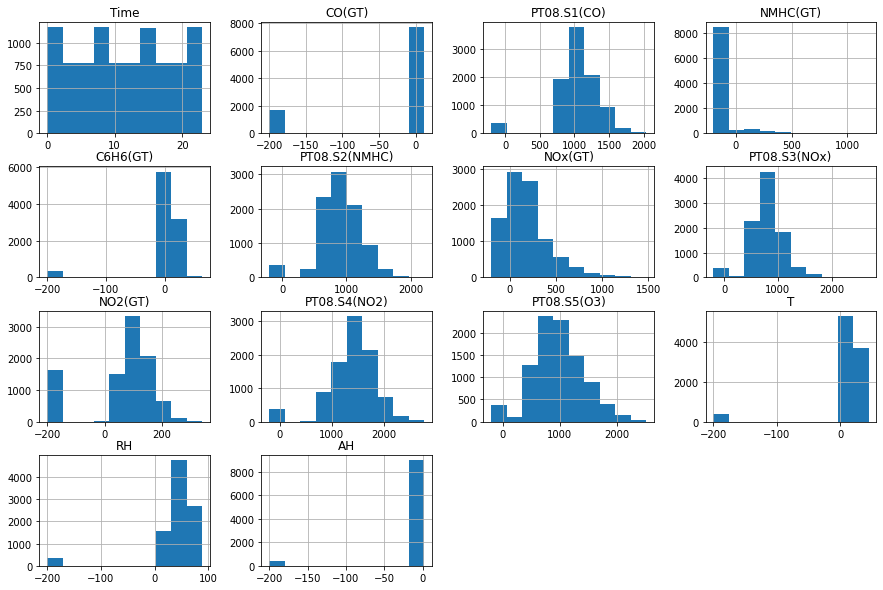

In [ ]:
data.hist(figsize=(15,10))

In [ ]:
data.replace(-200, float('nan'),regex=True)

pd.fillna(0)
pd.fillna({
    "T": 0,
    'NO': 100,
    'AH': data['AH'].mean() 
})

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=-200, strategy='mean')
for column in []:
  data[column] =  imputer.fit_transform(data[column])

In [ ]:
data['NMHC(GT)'].value_counts()

## Part 5: Classification

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test = pd.read_csv('/content/test.csv')
test

In [ ]:
data['Sex'].map({
    "female": 0,
    'male':1
})
data['Embarked'].map({
    "S": 0,
    'C':1,
    'Q':2
})



NameError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.drop(columns=['Ticket'], inplace=True)

In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [ ]:
data['Cabin'] = data['Cabin'].fillna(0)
data['Age'] = data['Age'].fillna(0)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.0,1,2,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C148,C


In [ ]:
features = data.drop(columns=['Survived','Name'])

labels = data['Survived']

In [ ]:
features

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,7.2500,0,S
1,2,1,0,38.0,1,0,71.2833,C85,C
2,3,3,0,26.0,0,0,7.9250,0,S
3,4,1,0,35.0,1,0,53.1000,C123,S
4,5,3,1,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,0,S
887,888,1,0,19.0,0,0,30.0000,B42,S
888,889,3,0,0.0,1,2,23.4500,0,S
889,890,1,1,26.0,0,0,30.0000,C148,C


In [ ]:
#features["Cabin"] = features.Cabin.astype('float')
#weather["Temp"] = pd.to_numeric(weather.Temp, errors='coerce')
features["Cabin"] = pd.to_numeric(features.Cabin,errors='coerce')
features["Embarked"] = pd.to_numeric(features.Embarked,errors='coerce')
features['Embarked'] = features['Embarked'].fillna(0)
features['Cabin'] = features['Cabin'].fillna(0)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        687 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [ ]:
features

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,7.2500,0.0,0.0
1,2,1,0,38.0,1,0,71.2833,0.0,0.0
2,3,3,0,26.0,0,0,7.9250,0.0,0.0
3,4,1,0,35.0,1,0,53.1000,0.0,0.0
4,5,3,1,35.0,0,0,8.0500,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,0.0,0.0
887,888,1,0,19.0,0,0,30.0000,0.0,0.0
888,889,3,0,0.0,1,2,23.4500,0.0,0.0
889,890,1,1,26.0,0,0,30.0000,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
tree = DecisionTreeClassifier()
svm = svm.SVC(kernel='linear')
neigh = KNeighborsClassifier(n_neighbors=3)
clf = LogisticRegression(random_state=0)


In [ ]:
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7653631284916201


In [ ]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7877094972067039


In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)